<a href="https://colab.research.google.com/github/archisha13/Deep-Learning/blob/main/B072_DL_LAB4_and_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>              NAME: ARCHISHA SRIVASTAVA 



>              DL_LAB4

>              ROLL NUM: B072


# AIM
To observe the effect of different learning rates of network for the given dataset 

In [ ]:
from sklearn.datasets import make_blobs #To create artificial dataset
import matplotlib.pyplot as plt # To display images

In [ ]:
# x,y= make_blobs(n_samples=1000, centers=3,n_features=2,cluster_std=2)

In [ ]:
x,y= make_blobs(n_samples=1000, centers=3,n_features=2,cluster_std=2,random_state=2)#The standard deviation of the clusters
#x is features
#y is label
#each sample will have 2 features

In [ ]:
x[0]#2 features and hence 2 values

array([ 0.48719811, -0.43160548])

In [ ]:
y[0]# corresponding to each we have a label

2

In [ ]:
# from numpy import where
# for label in range(3):
#   '''for all the rows in which label is 0 for 1st iteration its feature 1 
#   '''
#   row = where(y==label)
#   plt.scatter(x[row,0],x[row,1])
#   plt.title('sample dataset')
#   plt.xlabel('Feature 1 ')
#   plt.ylabel('Feature 2 ')

In [ ]:
# x,y= make_blobs(n_samples=1000, centers=3,n_features=2,cluster_std=0.8)

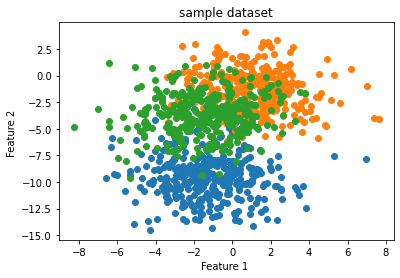

In [ ]:
from numpy import where
for label in range(3):
  #for all 
  row = where(y==label)
  plt.scatter(x[row,0],x[row,1])
  plt.title('sample dataset')
  plt.xlabel('Feature 1 ')
  plt.ylabel('Feature 2 ')

In [ ]:
# x,y= make_blobs(n_samples=1000, centers=5,n_features=2,cluster_std=1.2)

In [ ]:
# from numpy import where
# for label in range(5):
#   #for all 
#   row = where(y==label)
#   plt.scatter(x[row,0],x[row,1])
#   plt.title('sample dataset')
#   plt.xlabel('Feature 1 ')
#   plt.ylabel('Feature 2 ')



```
y    y_onehot

0    100
2    001
1    010
```


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y= to_categorical(y)

In [ ]:
y[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
#taking 800 samples as training data from 1000 samples 
n_train=800
train_x,test_x = x[:n_train,:],x[n_train:,:]
#in training set take 0 to 799 rows and all cols 
#for testing take 800 to end(1000) rows and all cols
train_y,test_y = y[:n_train,:],y[n_train:,:]

In [ ]:
train_x.shape

(800, 2)

In [ ]:
'''sigmoid gives independent probability for each (binary--->either yes or no --> only 1 output)
whereas softmax gives probaibilty distribution ->hence total prob =1'''
from keras.layers import Dense
from keras.models import Sequential
model=Sequential()
#between input layer and 1st hidden layer 2 deatures hence 2 inputs and 50 neurons in 1st hidden layer
model.add(Dense(50,input_dim=2,activation='relu'))
# model.add(Dense(50,activation='relu'))#softmax doesnt give absolute value
model.add(Dense(3,activation='softmax'))#softmax doesnt give absolute value it gives probability(non binary class)

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import SGD

In [ ]:
# opt = SGD(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy',optimizer=opt,metrics='accuracy')
# history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10)
# plt.plot(history.history['accuracy'],label='train')
# plt.plot(history.history['Validation'],label='Validation')

In [ ]:
def fit_model(train_x,train_y,test_x,test_y,l_rate):
  #creating a new model for different learning rates
  model=Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))#to get uniform/normal/gaussian distrubution
  model.add(Dense(3,activation='softmax'))
  #lr
  opt = SGD(learning_rate=l_rate)

  #compiling the model
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics='accuracy')
  #fitting the model
  history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200, verbose=0)

  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='Validation')

  plt.title('l_rate = '+str(l_rate))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

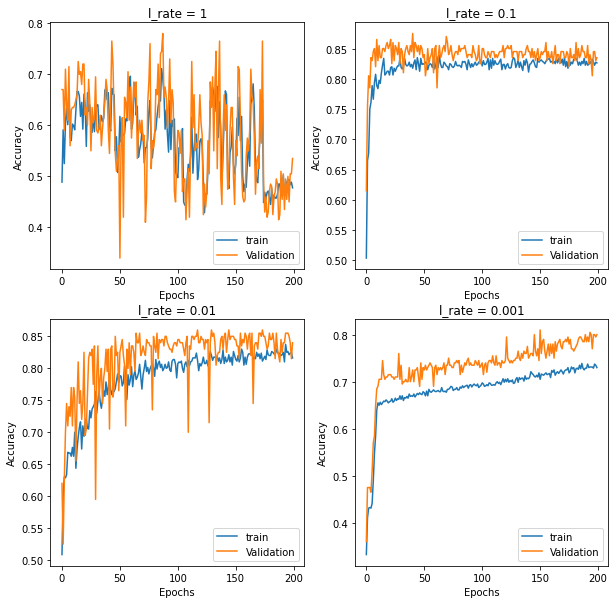

In [ ]:
learning_rates = [1,0.1,0.01,0.001]
plt.figure(figsize =(10,10))
for i in range(len(learning_rates)):
  #2 rows and 2 cols-->matplotlib takes 1 not 0 as the first index
  plt.subplot(2,2,i+1)
  fit_model(train_x,train_y,test_x,test_y,learning_rates[i])


# CONCLUSION


*   Artififcial Neural Network with 1 hidden layer is built  to classify 3 classes of the given dataset(can be seen the graph)

*   Stochastic gradient descent algorithm with didffefrent learning rates is used to train the network to classify the samples
*   Results show that for 

  1.   learning rate =1 , Training and validation accuracy is oscillating ,because learning rate is to high for the network
  2.   learning rate = 0.1 , Oscillations are reduced an dtraining and validation accuracies are almost the same varying between 0.8 to 0.85
  3. learning rate = 0.01 , validation accuracy is higher than training accuracy, this shows that network should be added with more hidden layers and neurons.(i.e the network is underfit)
  4. learning rate = 0.001 , Traning and validation accuracies are lesser than 0.8

*  Learning rate of 0.1 is hsowing us the best among the 4 learning rates and both validation and taraining accuracies are almost the same



# STOCHASTIC WITH MOMENTUM



>              NAME: ARCHISHA SRIVASTAVA 



>              DL_LAB5

>              ROLL NUM: B072

# AIM
To evaluate the given Network for given optimizers

In [ ]:
def fit_model(train_x,train_y,test_x,test_y,mom):
  #creating a new model for different learning rates
  model=Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))#to get uniform/normal/gaussian distrubution
  model.add(Dense(3,activation='softmax'))

  opt = SGD(learning_rate =0.01,momentum = mom)

  #compiling the model
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics='accuracy')
  #fitting the model
  history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200,verbose=0)

  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('momentum = '+str(mom))

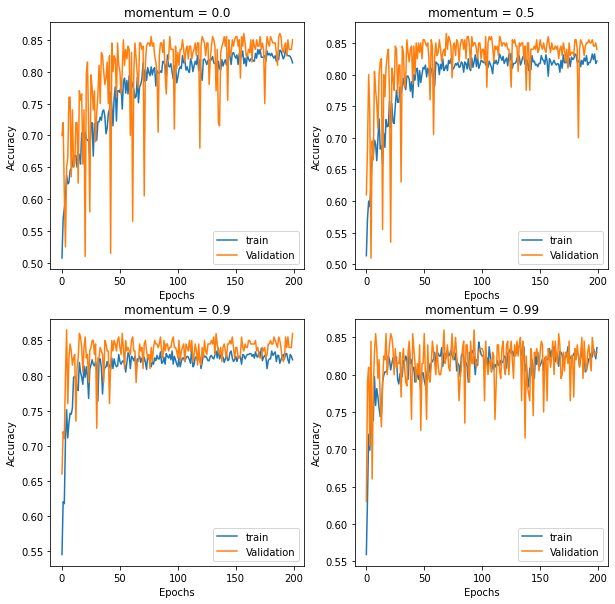

In [ ]:
mom_values =[0.0,0.5,0.9,0.99]
plt.figure(figsize =(10,10))
for i in range(len(mom_values)):
  #2 rows and 2 cols-->matplotlib takes 1 not 0 as the first index
  plt.subplot(2,2,i+1)
  fit_model(train_x,train_y,test_x,test_y,mom_values[i])

# CONCLUSION

SGD optimizer with momentum is used to train the network to classify the samples


> [ FOR LEARNING RATE =0.01 ]



*   For momentum =0:
The validation accuracy is oscillating moe than the accuracy for other values of momentum

*   Among all the values of momentum training and validation accuracy are almost the same for momentum = 0.99 , also the training is coverging in about 10 epochs we are getting a good accuracy 
*   When no momentum is used accuracy is achieved with 50 epochs but with momentum, accuracy is achieved with 10 epochs


In [ ]:
def fit_model(train_x,train_y,test_x,test_y,optmz):
  #creating a new model for different learning rates
  model=Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))#to get uniform/normal/gaussian distrubution
  model.add(Dense(3,activation='softmax'))

  # opt=optmz
  # opt = SGD(learning_rate =0.01,momentum = mom)

  #compiling the model
  model.compile(loss='categorical_crossentropy',optimizer=optmz,metrics='accuracy')
  #fitting the model
  history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200,verbose=0)

  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('optimizer = '+str(optmz))

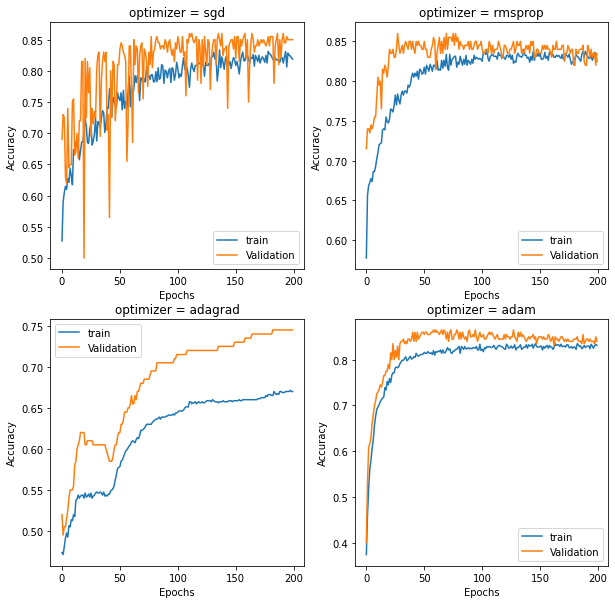

In [ ]:
opt=['sgd','rmsprop','adagrad','adam']
plt.figure(figsize =(10,10))
for i in range(len(opt)):
  #2 rows and 2 cols-->matplotlib takes 1 not 0 as the first index
  plt.subplot(2,2,i+1)
  fit_model(train_x,train_y,test_x,test_y,opt[i])

# CONCLUSION
For the given dataset ,network is trained for different types of optimizers
It can be shown that rms prop and adam is giving the best accuracy within least number of epochs